In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_bank_transactions = pd.read_csv("bank_transactions.csv")

# Parse with flexible logic
df_bank_transactions['CustomerDOB'] = pd.to_datetime(df_bank_transactions['CustomerDOB'], dayfirst=True, errors='coerce')
current_year = datetime.now().year
df_bank_transactions['CustomerDOB'] = df_bank_transactions['CustomerDOB'].apply(
    lambda x: x.replace(year=x.year - 100) if x.year > current_year else x
)
df_bank_transactions['TransactionDate'] = pd.to_datetime(df_bank_transactions['TransactionDate'], dayfirst=True, errors='coerce')
# Format like Excel
df_bank_transactions['CustomerDOB'] = df_bank_transactions['CustomerDOB'].dt.strftime('%d-%m-%Y')
df_bank_transactions['TransactionDate'] = df_bank_transactions['TransactionDate'].dt.strftime('%d-%m-%Y')
df_bank_transactions.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [3]:
df_bank_transactions_copy = df_bank_transactions.copy()
df_bank_transactions_copy.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [4]:
df_bank_transactions.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [5]:
df_bank_transactions_copy["CustomerDOB"] = pd.to_datetime(df_bank_transactions_copy["CustomerDOB"], format= "%d-%m-%Y")
df_bank_transactions_copy["TransactionDate"] = pd.to_datetime(df_bank_transactions_copy["TransactionDate"], format= "%d-%m-%Y")

In [6]:
df_bank_transactions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


In [7]:


# Step 1: Convert 'CustomerDOB' to datetime and calculate age
current_year = datetime.now().year
df_bank_transactions_copy['Age'] = current_year - df_bank_transactions_copy['CustomerDOB'].dt.year

# Step 3: Format 'TransactionTime' into HH:MM:SS
df_bank_transactions_copy['TransactionTime'] = df_bank_transactions_copy['TransactionTime'].astype(str).str.zfill(6)
df_bank_transactions_copy['TransactionTime'] = pd.to_datetime(df_bank_transactions_copy['TransactionTime'], format='%H%M%S', errors='coerce').dt.time

# Step 4: Clean column names
df_bank_transactions_copy.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'}, inplace=True)

# Step 5: Handle missing values
df_bank_transactions_copy.dropna(inplace=True)

# Step 6: Encode categorical variables
df_bank_transactions_copy['GenderCode'] = df_bank_transactions_copy['CustGender'].astype('category').cat.codes
df_bank_transactions_copy['LocationCode'] = df_bank_transactions_copy['CustLocation'].astype('category').cat.codes

# Step 7: Drop duplicates
df_bank_transactions_copy.drop_duplicates(inplace=True)

# Final shape after cleaning
# df_bank_transactions_copy.shape
df_bank_transactions_copy.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,GenderCode,LocationCode
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.00,31.0,0,3557
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.00,68.0,1,3618
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.00,29.0,0,5219
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.00,52.0,0,5219
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.50,37.0,0,5606
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,17:39:40,676.00,53.0,0,3473
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,17:38:06,566.00,33.0,0,5219
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,17:05:37,148.00,43.0,1,5219
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,19:28:25,833.00,37.0,0,3058
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,19:24:46,289.11,41.0,1,5219


In [8]:
df_bank_transactions_copy.isnull().sum()

TransactionID         0
CustomerID            0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
Age                   0
GenderCode            0
LocationCode          0
dtype: int64

In [9]:
df_bank_transactions_copy.shape

(1041614, 12)

In [10]:
#  Time slot extraction
def get_time_slot(t):
    h = int(t[:2])
    if 5 <= h < 12:
        return 'Morning'
    elif 12 <= h < 17:
        return 'Afternoon'
    elif 17 <= h < 21:
        return 'Evening'
    else:
        return 'Night'
df_bank_transactions_copy['TransactionTime'] = df_bank_transactions_copy['TransactionTime'].astype(str)
df_bank_transactions_copy['TimeSlot'] = df_bank_transactions_copy['TransactionTime'].str[:2].apply(get_time_slot)
df_bank_transactions_copy['Age'] = df_bank_transactions_copy['Age'].astype(int)


In [11]:

# Final shape after cleaning
df_bank_transactions_copy.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,GenderCode,LocationCode,TimeSlot
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.00,31,0,3557,Afternoon
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.00,68,1,3618,Afternoon
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.00,29,0,5219,Afternoon
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.00,52,0,5219,Afternoon
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.50,37,0,5606,Evening
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,17:39:40,676.00,53,0,3473,Evening
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,17:38:06,566.00,33,0,5219,Evening
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,17:05:37,148.00,43,1,5219,Evening
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,19:28:25,833.00,37,0,3058,Evening
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,19:24:46,289.11,41,1,5219,Evening


In [12]:
# Analyze customer spending

# 1. Top 10 cities by total spend
top_cities = df_bank_transactions_copy.groupby('CustLocation')['TransactionAmount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Cities by Spend:\n", top_cities)


Top 10 Cities by Spend:
 CustLocation
MUMBAI       1.747338e+08
NEW DELHI    1.584735e+08
BANGALORE    1.174852e+08
GURGAON      1.114485e+08
DELHI        1.051617e+08
KOLKATA      6.031786e+07
CHENNAI      4.427020e+07
NOIDA        4.424702e+07
PUNE         3.906549e+07
HYDERABAD    3.597353e+07
Name: TransactionAmount, dtype: float64


In [13]:

# 2. Top 10 customers by average transaction
avg_trans_per_customer = df_bank_transactions_copy.groupby('CustomerID')['TransactionAmount'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Avg Transaction:\n", avg_trans_per_customer)



Top 10 Customers by Avg Transaction:
 CustomerID
C7319271    1560034.99
C6677159    1380002.88
C4141768     991132.22
C1830891     720001.16
C6549785     600008.32
C5036642     600003.45
C4328064     569500.27
C1425138     561001.00
C5833636     557000.73
C7549492     543699.36
Name: TransactionAmount, dtype: float64


In [14]:

# 3. Transaction count by time of day
time_slot_counts = df_bank_transactions_copy['TimeSlot'].value_counts()
print("\nTransaction Counts by Time of Day:\n", time_slot_counts)



Transaction Counts by Time of Day:
 Evening      337964
Afternoon    319253
Night        205853
Morning      178544
Name: TimeSlot, dtype: int64


In [15]:

# 4. Daily spending trend (last 10 days)
daily_spend = df_bank_transactions_copy.groupby('TransactionDate')['TransactionAmount'].sum().sort_index().tail(10)
print("\nDaily Spend (Last 10 Days):\n", daily_spend)


Daily Spend (Last 10 Days):
 TransactionDate
2016-09-15    28594186.15
2016-09-18    23537230.39
2016-09-22    12590042.45
2016-09-23     4682132.64
2016-09-25    11926258.80
2016-09-26    20477176.09
2016-09-27    10785749.73
2016-09-30     3273193.81
2016-10-16        1067.00
2016-10-21     7623539.07
Name: TransactionAmount, dtype: float64


In [16]:
# Insights

# 1. Which cities have the highest total transaction amount
# 2. Which customers are top average spenders
# 3. What time of day people transact most
# 4. How spending trends have moved over recent days

# Visualization


# 1. Analyse the customer transaction patterns

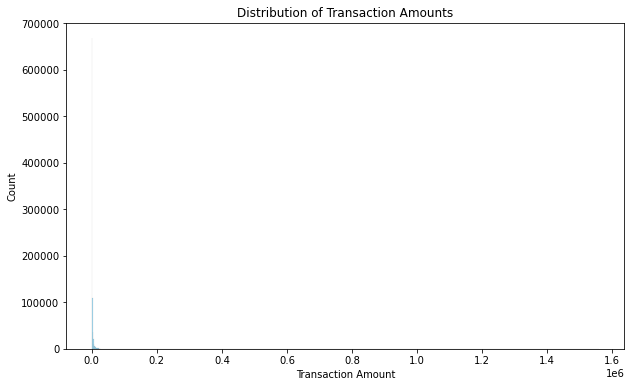

In [17]:

transaction_patterns = df_bank_transactions_copy.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
transaction_patterns
plt.figure(figsize = (10,6))
sns.histplot(transaction_patterns["TransactionAmount"], bins =  1000, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
# plt.xlim(0, df_bank_transactions_copy['TransactionAmount'].quantile(0.99))  # Focus on common range
plt.show()

# 2. Average Spend by Gender

In [18]:
avg_spend_gender_wise = df_bank_transactions_copy.groupby("CustGender")["TransactionAmount"].mean().reset_index()
avg_spend_gender_wise.columns = ['CustGender', 'TransactionAmountCount']
avg_spend_gender_wise

,CustGender,TransactionAmountCount
0,F,1643.958457
1,M,1537.341185
2,T,32500.000000


Text(0, 0.5, 'TransactionAmountCount')

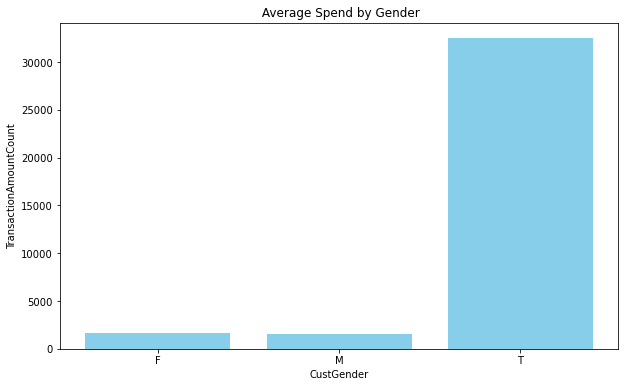

In [19]:


plt.figure(figsize = (10,6))

plt.bar(avg_spend_gender_wise["CustGender"], avg_spend_gender_wise["TransactionAmountCount"] , color ="skyblue")
plt.title(" Average Spend by Gender")
plt.xlabel("CustGender")
plt.ylabel("TransactionAmountCount")

# 3. Spending by Age Group

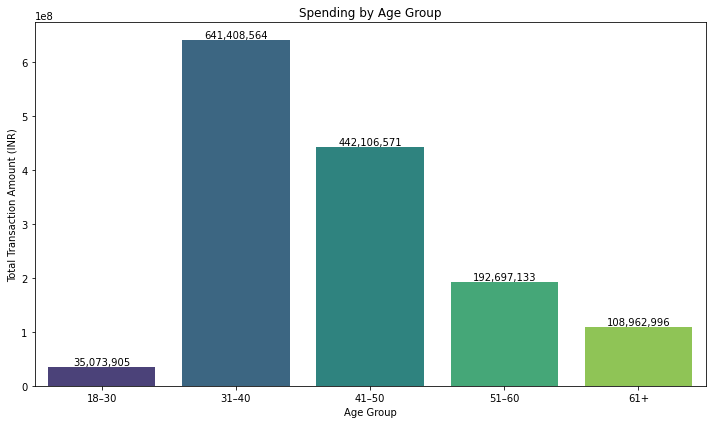

In [20]:

# 1. Group again with numeric totals
binList = [18, 30, 40, 50, 60, 80]
df_bank_transactions_copy["AgeGroup"] = pd.cut(df_bank_transactions_copy["Age"], bins=binList, labels=["18–30", "31–40", "41–50", "51–60", "61+"])

# 2. Group by Age Group
spend_age_wise = df_bank_transactions_copy.groupby("AgeGroup")["TransactionAmount"].sum().reset_index()
spend_age_wise.columns = ['AgeGroup', 'TotalTransactionAmount']

# 3. Sort (numeric)
spend_age_wise = spend_age_wise.sort_values(by="TotalTransactionAmount", ascending=False)

# 4. Plot with readable Y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="TotalTransactionAmount", data=spend_age_wise, palette="viridis")

# 5. Add comma-separated labels
for i, row in spend_age_wise.iterrows():
    plt.text(i, row.TotalTransactionAmount, f"{row.TotalTransactionAmount:,.0f}", ha='center', va='bottom')

plt.xlabel("Age Group")
plt.ylabel("Total Transaction Amount (INR)")
plt.title("Spending by Age Group")
plt.tight_layout()
plt.show()


# Top 10 cities by total transaction amount

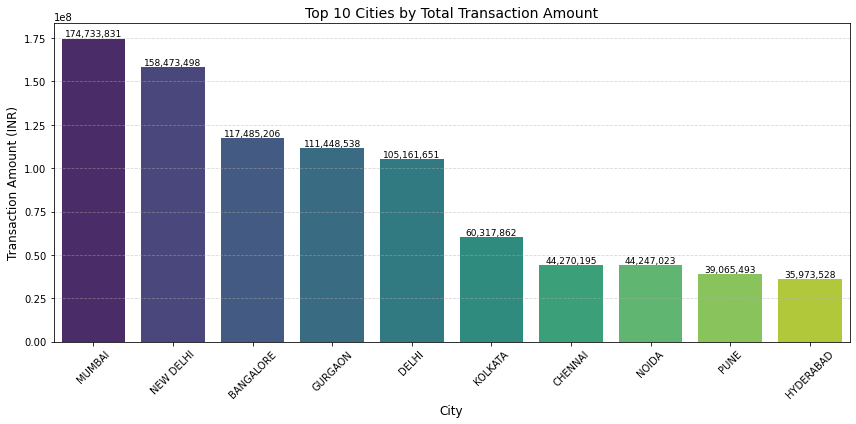

In [21]:

transaction_patterns = df_bank_transactions_copy.groupby('CustLocation')['TransactionAmount'].sum().reset_index()
top10cities = transaction_patterns.sort_values(by = "TransactionAmount", ascending = False).head(10)

top10cities
#  Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10cities, x='CustLocation', y='TransactionAmount', palette='viridis')

# Add comma-separated labels above bars
for i, row in enumerate(top10cities.itertuples()):
    plt.text(i, row.TransactionAmount, f"{row.TransactionAmount:,.0f}", ha='center', va='bottom', fontsize=9)

# Customize
plt.title("Top 10 Cities by Total Transaction Amount", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Transaction Amount (INR)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [22]:
top10cities

,CustLocation,TransactionAmount
5219,MUMBAI,1.747338e+08
5738,NEW DELHI,1.584735e+08
770,BANGALORE,1.174852e+08
3058,GURGAON,1.114485e+08
2055,DELHI,1.051617e+08
4231,KOLKATA,6.031786e+07
1591,CHENNAI,4.427020e+07
5833,NOIDA,4.424702e+07
6656,PUNE,3.906549e+07
3367,HYDERABAD,3.597353e+07


In [23]:
# top_cities = df_bank_transactions_copy.groupby('CustLocation')['TransactionAmount'].sum().sort_values(ascending=False).head(10)
# top_cities.plot(kind='barh', title='Top 10 Cities by Total Spend', figsize=(10, 6), color='skyblue')
# plt.xlabel("Total Transaction Amount (INR)")
# plt.ylabel("City")
# plt.gca().invert_yaxis()
# plt.show()

# Top 10 customers by average transaction

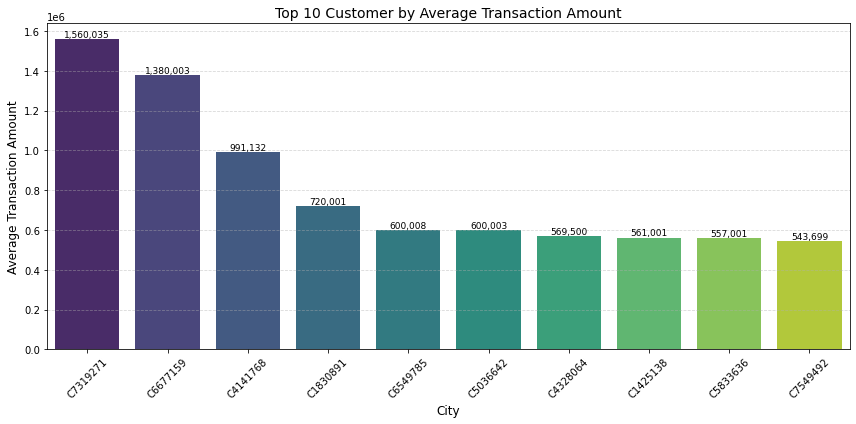

In [24]:
avg_trans_per_customer = df_bank_transactions_copy.groupby('CustomerID')['TransactionAmount'].mean().sort_values(ascending=False).head(10).reset_index()
avg_trans_per_customer

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_trans_per_customer, x='CustomerID', y='TransactionAmount', palette='viridis')

# Add comma-separated labels above bars
for i, row in enumerate(avg_trans_per_customer.itertuples()):
    plt.text(i, row.TransactionAmount, f"{row.TransactionAmount:,.0f}", ha='center', va='bottom', fontsize=9)

# Customize
plt.title("Top 10 Customer by Average Transaction Amount", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Transaction Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 3. Transaction count by time of day

Text(0.5, 1.0, 'Transaction count by time of day')

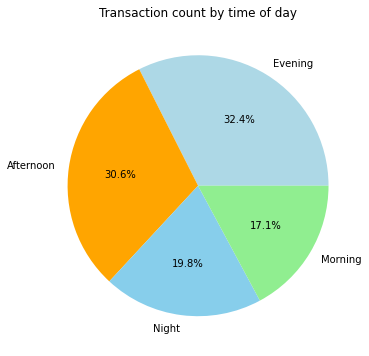

In [25]:

# 3. Transaction count by time of day
time_slot_counts = df_bank_transactions_copy['TimeSlot'].value_counts()

# Pie Chart
plt.figure(figsize=(10,6))
plt.pie(time_slot_counts, labels = time_slot_counts.index, autopct = "%1.1f%%", colors = ['#ADD8E6', '#FFA500', 'SkyBlue', 'LightGreen'])
plt.title("Transaction count by time of day")

# 4. Daily spending trend (last 10 days)

In [26]:
daily_spend = df_bank_transactions_copy.groupby('TransactionDate')['TransactionAmount'].sum().sort_index().tail(10)
daily_spend 

TransactionDate
2016-09-15    28594186.15
2016-09-18    23537230.39
2016-09-22    12590042.45
2016-09-23     4682132.64
2016-09-25    11926258.80
2016-09-26    20477176.09
2016-09-27    10785749.73
2016-09-30     3273193.81
2016-10-16        1067.00
2016-10-21     7623539.07
Name: TransactionAmount, dtype: float64